In [ ]:
#importing necessary libraries

import pandas as pd

In [ ]:
df=pd.read_csv("IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.value_counts("sentiment")

,count
sentiment,
negative,25000
positive,25000


re is regular expression to clean the raw text docuements

nltk is for text pre processing like removing stopwords

In [ ]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)          # remove HTML
    text = re.sub(r'[^a-z\s]', '', text)       # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stop_words)

{'will', "they'd", 'their', "she'll", 'had', 'he', 'mustn', 'or', 'there', 'those', "it's", "doesn't", 'haven', 'few', "isn't", 'each', 'having', 'just', 'they', "they're", 'himself', "wouldn't", 'you', 'so', 'yourselves', 'aren', 'me', 'both', 'can', 'him', 'through', 'who', 'theirs', 'ours', 'between', "mustn't", 'once', 'up', 'while', 'after', 'as', "she's", 'd', 'to', 'on', "they've", "we've", "you'd", 'a', 'shan', 'if', "should've", 'and', 'under', "didn't", 'wouldn', "hasn't", "i'll", 'y', 'herself', 'hasn', "haven't", 'my', "couldn't", 'needn', 'with', 'where', 'been', "wasn't", "he'd", 'such', 'at', 'weren', 'yourself', 'again', 'how', 'for', 'our', "shouldn't", 'these', 'own', 're', "aren't", 'do', 'i', 'mightn', 'o', 'some', "that'll", 'am', 'off', 've', "hadn't", "i've", 'why', 'when', 'itself', 'whom', 'over', 'above', "it'll", 'themselves', 'before', 'out', 'her', 'of', "we'll", 'isn', 'nor', "weren't", "we're", 'other', 'should', 'too', 'doing', 'same', 'it', "they'll", '

In [ ]:
df["clean_review"]

,clean_review
0,one reviewers mentioned watching oz episode yo...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,im going disagree previous comment side maltin...


In [ ]:
stop_words.remove("not")

In [ ]:
print(len(stop_words))

197


In [ ]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df['sentiment']

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


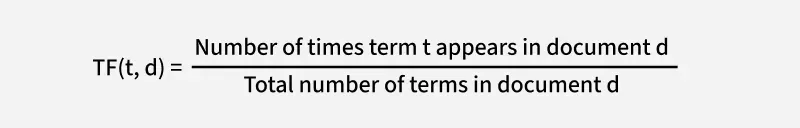

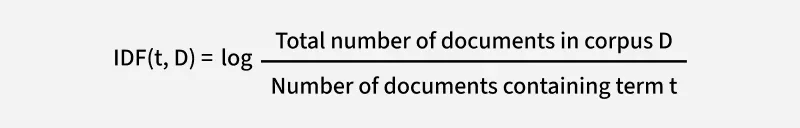




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), use_idf = True)

X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']

we conclude with uni gram and bi gram we get highest accuracy

In [ ]:
feature_names = vectorizer.get_feature_names_out()
idf_values = vectorizer.idf_

tfidf_df = pd.DataFrame({'feature': feature_names, 'idf': idf_values})
tfidf_df = tfidf_df.sort_values(by='idf', ascending=False)

print(tfidf_df)

                                       feature        idf
3485441  zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz ooops  11.126651
3485424                              zzzz like  11.126651
3485423                            zzzz boring  11.126651
3485421                         zzvorkov treat  11.126651
3485420                         zzvorkov emlie  11.126651
...                                        ...        ...
1290076                                   good   1.994867
1742514                                   like   1.791795
1099335                                   film   1.614467
2146543                                    one   1.597748
1996440                                  movie   1.512480

[3485442 rows x 2 columns]


In [ ]:
print(len(tfidf_df))

3485442


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("----------------------------------------------")
print(classification_report(y_test, y_pred))

Accuracy: 0.8912
----------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("----------------------------------------------")
print(classification_report(y_test, y_pred))

Accuracy: 0.8886
----------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4961
           1       0.90      0.88      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# **Dumping the model in pickle files**

In [ ]:
import pickle

pickle.dump(model, open("sentiment_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))

In [ ]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.1 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load model and vectorizer
model = pickle.load(open("sentiment_model.pkl", "rb"))
vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

st.title("🎬 Movie Review Sentiment Analyzer")
st.write("Classify movie reviews as **Positive** or **Negative**")

user_input = st.text_input("Enter your movie review:")


if st.button("Analyze Sentiment"):
    cleaned = clean_text(user_input)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]

    if prediction == 1:
        st.success("✅ Positive Review")
    else:
        st.error("❌ Negative Review")


Writing app.py
